# Machine Learning and Statistics for Physicists

## Homework 2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [4]:
from mls import locate_data
pong_data = pd.read_hdf(locate_data('pong_data.hf5'))
pong_targets = pd.read_hdf(locate_data('pong_targets.hf5'))

### Problem 1

We often coerce data for machine learning into a 2D array of samples x features, but this sometimes obscures the natural structure of the data.  In these cases, it is helpful to use special-purpose visualizations that know about this natural structure.

Samples of `pong_data` encode 2D trajectories of a ping-pong ball. Implement the function below to transform one sample into a 2D array of trajectory coordinates suitable for plotting:

In [3]:
pong_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.049004,0.132093,0.212905,0.291504,0.367950,0.442301,0.514615,0.584949,0.653355,0.719888,0.0,0.125206,0.217122,0.276658,0.304702,0.302116,0.269740,0.208390,0.118860,0.001921
std,0.062998,0.067380,0.075805,0.086806,0.099285,0.112547,0.126175,0.139919,0.153624,0.167196,0.0,0.010876,0.021454,0.031742,0.041748,0.051481,0.060946,0.070153,0.079107,0.087815
min,-0.161553,-0.089041,-0.018516,0.050077,0.116790,0.181677,0.244785,0.306165,0.365863,0.415850,0.0,0.093722,0.155016,0.184769,0.183846,0.153088,0.093310,0.005310,-0.110141,-0.252291
25%,-0.001755,0.079435,0.157023,0.229517,0.293469,0.353604,0.414068,0.473338,0.532280,0.590583,0.0,0.115816,0.198597,0.249250,0.268654,0.257665,0.217116,0.147817,0.050555,-0.073903
50%,0.076534,0.148675,0.205846,0.270214,0.338380,0.406922,0.476322,0.542847,0.608249,0.673589,0.0,0.127098,0.220852,0.282177,0.311961,0.311068,0.280338,0.220589,0.132616,0.017191
75%,0.100177,0.187800,0.286463,0.383127,0.475724,0.565217,0.651398,0.734418,0.816378,0.896600,0.0,0.132847,0.232193,0.298956,0.334029,0.338281,0.312554,0.257672,0.174431,0.063610
max,0.151118,0.261095,0.370325,0.476563,0.579891,0.684321,0.787124,0.887111,0.984358,1.078941,0.0,0.144799,0.255769,0.333838,0.379908,0.394854,0.379530,0.334764,0.261364,0.160113


In [4]:
pong_targets.describe()

,th0,hit,grp
count,1000.000000,1000.000000,1000.000000
mean,1.035846,0.180000,0.700000
std,0.130601,0.984159,0.781416
min,0.722729,-1.000000,0.000000
25%,0.920399,-1.000000,0.000000
50%,1.044115,1.000000,0.500000
75%,1.118522,1.000000,1.000000
max,1.334311,1.000000,2.000000


In [5]:
def sample_to_trajectory(sample):
    """Reshape a pong data sample of length N into an (x,y) array of shape (2, N/2).
    
    Parameters
    ----------
    sample : array
        Numpy array of length N.
    
    Returns
    -------
    array
        Array of length (2, N/2) where the first index is 0, 1 for x, y coordinates.
    """
    assert len(sample) % 2 == 0, 'len(sample) is not divisible by two.'
    return sample.reshape((2,np.int_(sample.size/2)))
    #raise NotImplementedError()

In [6]:
dunno=pong_data.iloc[:1].values
dunno
rowlength=dunno.size/2
#dunno.reshape((2,np.int_(rowlength)))
dunno.reshape((2,np.int_(dunno.size/2)))

array([[-0.06528929,  0.02689222,  0.11654837,  0.20374834,  0.28855943,
         0.37104707,  0.45127492,  0.52930488,  0.60519718,  0.67901036],
       [ 0.        ,  0.12109256,  0.2090066 ,  0.26465107,  0.28891001,
         0.28264325,  0.24668704,  0.18185476,  0.08893747, -0.03129542]])

In [7]:
sample = np.arange(10)
sample_to_trajectory(sample)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [8]:
# A correct solution should pass these tests.
sample = np.arange(10)
xy = sample_to_trajectory(sample)
assert xy.shape == (2, 5)
assert np.array_equal(xy[0], [0, 1, 2, 3, 4])
assert np.array_equal(xy[1], [5, 6, 7, 8, 9])

Use the function below to plot some samples as trajectories, color coded by their target "grp" value:

In [9]:
def plot_trajectories(nrows=50):
    for row in range(nrows):
        x, y = sample_to_trajectory(pong_data.iloc[row].values)
        grp = int(pong_targets['grp'][row])
        color = 'krb'[grp]
        plt.plot(x, y, ls='-', c=color)

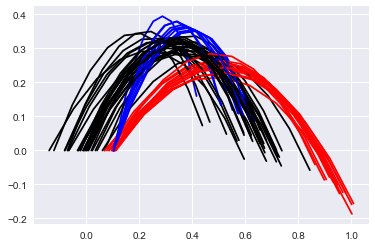

In [10]:
plot_trajectories()

It should be obvious from this plot why the `y0` column is all zeros.

Implement the function below using `sns.distplot` to show the distribution of `x0` values for each value (0, 1, 2) of the target `grp`.  Your plot should resemble this one:
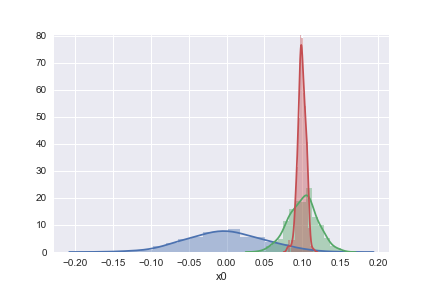

In [11]:
pong_data['x0'][pong_targets['grp']==1]

5      0.077645
8      0.106262
10     0.107498
13     0.086395
18     0.109044
19     0.086176
20     0.068399
24     0.102770
26     0.103201
32     0.098038
40     0.103619
41     0.096412
42     0.112265
55     0.085817
65     0.118321
74     0.113172
77     0.102336
82     0.106918
85     0.104061
87     0.088727
90     0.106917
91     0.112225
94     0.126550
101    0.093842
102    0.129023
104    0.123508
107    0.106511
108    0.077315
109    0.106899
121    0.088957
         ...   
883    0.091902
892    0.097180
903    0.103126
906    0.143163
907    0.098229
913    0.107236
920    0.100286
921    0.126644
924    0.080764
934    0.121931
935    0.066397
936    0.113486
937    0.126187
938    0.107029
942    0.104657
945    0.105689
946    0.062630
950    0.107000
951    0.130505
952    0.068111
955    0.093666
957    0.108684
961    0.056811
965    0.098715
971    0.096442
974    0.113727
980    0.119571
984    0.104819
985    0.080604
986    0.086493
Name: x0, Length: 300, d

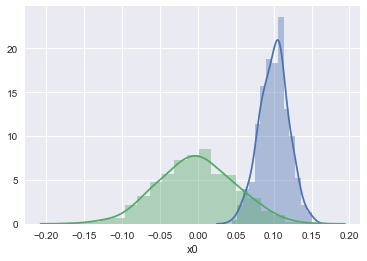

In [12]:
sns.distplot(pong_data['x0'][pong_targets['grp']==1])
sns.distplot(pong_data['x0'][pong_targets['grp']==0])

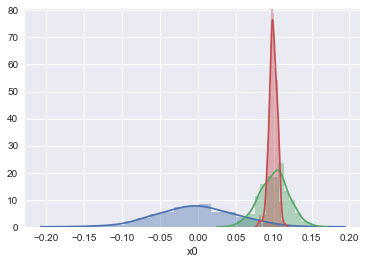

In [13]:
def compare_groups():
    """Plot 1D distributions of the x0 feature for each group (grp=0,1,2).
    """
    # YOUR CODE HERE
    for i in [0,1,2]:
        sns.distplot(pong_data['x0'][pong_targets['grp']==i])
    #raise NotImplementedError()
    
compare_groups()

To get some insight into the `th0` target, implement the function below to add a `slope` column to `pong_data` that calculates the initial trajectory slope, then make a scatter plot of `slope` versus `th0` using `sns.jointplot`.  Your plot should resemble this one:
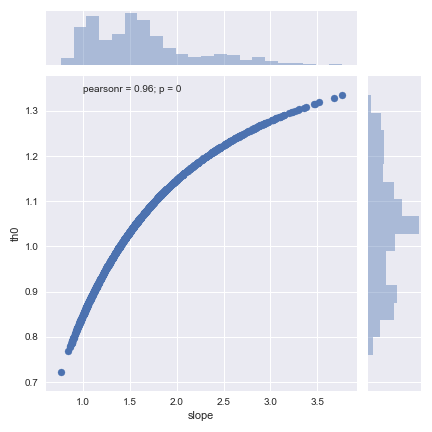

In [14]:
pong_data2=pong_data
pong_data2['slope']=pong_data2['x0']
pong_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y1,y2,y3,y4,y5,y6,y7,y8,y9,slope
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.049004,0.132093,0.212905,0.291504,0.367950,0.442301,0.514615,0.584949,0.653355,0.719888,...,0.125206,0.217122,0.276658,0.304702,0.302116,0.269740,0.208390,0.118860,0.001921,0.049004
std,0.062998,0.067380,0.075805,0.086806,0.099285,0.112547,0.126175,0.139919,0.153624,0.167196,...,0.010876,0.021454,0.031742,0.041748,0.051481,0.060946,0.070153,0.079107,0.087815,0.062998
min,-0.161553,-0.089041,-0.018516,0.050077,0.116790,0.181677,0.244785,0.306165,0.365863,0.415850,...,0.093722,0.155016,0.184769,0.183846,0.153088,0.093310,0.005310,-0.110141,-0.252291,-0.161553
25%,-0.001755,0.079435,0.157023,0.229517,0.293469,0.353604,0.414068,0.473338,0.532280,0.590583,...,0.115816,0.198597,0.249250,0.268654,0.257665,0.217116,0.147817,0.050555,-0.073903,-0.001755
50%,0.076534,0.148675,0.205846,0.270214,0.338380,0.406922,0.476322,0.542847,0.608249,0.673589,...,0.127098,0.220852,0.282177,0.311961,0.311068,0.280338,0.220589,0.132616,0.017191,0.076534
75%,0.100177,0.187800,0.286463,0.383127,0.475724,0.565217,0.651398,0.734418,0.816378,0.896600,...,0.132847,0.232193,0.298956,0.334029,0.338281,0.312554,0.257672,0.174431,0.063610,0.100177
max,0.151118,0.261095,0.370325,0.476563,0.579891,0.684321,0.787124,0.887111,0.984358,1.078941,...,0.144799,0.255769,0.333838,0.379908,0.394854,0.379530,0.334764,0.261364,0.160113,0.151118


In [15]:
slope=(pong_data['y1'].values - pong_data['y0'].values) / (pong_data['x1'].values - pong_data['x0'].values)
slope

array([1.3136317 , 2.06138605, 1.61158869, 1.78821132, 2.07691641,
       1.12506705, 1.44667269, 1.59833423, 0.94609973, 1.21603302,
       1.15006593, 1.73177784, 3.75996553, 1.12786182, 1.82206771,
       2.33798951, 2.03579598, 1.33739868, 1.08448674, 1.01512409,
       0.88107448, 1.41888628, 1.93299272, 1.30593135, 1.0244405 ,
       2.36970231, 1.10687272, 1.26041266, 1.37200009, 1.56360663,
       1.3606866 , 1.55592719, 1.05390212, 2.51059284, 1.55799377,
       2.82183522, 2.8389697 , 1.45411453, 2.14662441, 1.61181574,
       1.2753295 , 0.9401103 , 1.02122038, 1.70881716, 1.59344479,
       1.71173668, 1.75528654, 2.27580417, 1.64979853, 1.48412728,
       1.75751575, 1.58382406, 2.5421299 , 1.76300362, 1.64532299,
       0.93711683, 1.88548733, 1.93827844, 1.71267049, 1.45147911,
       2.84048906, 1.53708035, 1.57815512, 1.30831251, 1.57831515,
       1.13185506, 1.49822164, 1.77488206, 2.30610177, 1.52171226,
       1.44172362, 1.6349453 , 3.0163811 , 1.60546976, 1.22736

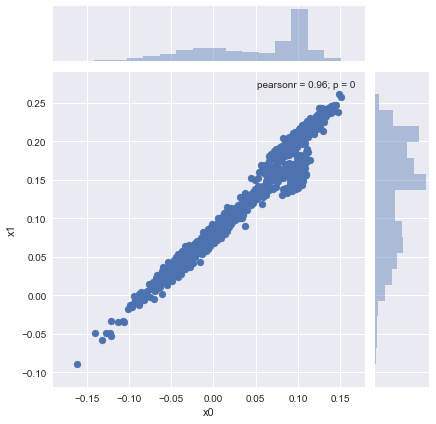

In [16]:
sns.jointplot(pong_data['x0'],pong_data['x1'])

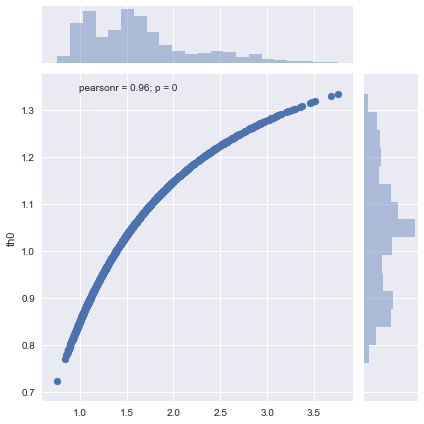

In [17]:
def compare_slope_th0():
    """Display scatter plot of calculated initial slope vs target th0.
    """
    # YOUR CODE HERE
    slope=(pong_data['y1'].values - pong_data['y0'].values) / (pong_data['x1'].values - pong_data['x0'].values)
    sns.jointplot(slope,pong_targets['th0'])
    #raise NotImplementedError()
    
compare_slope_th0()

### Problem 2

The normal (aka Gaussian) distribution is one of the fundamental probability densities that we will encounter often.

Implement the function below using `np.random.multivariate_normal` to generate random samples from an arbitrary multidimensional normal distribution, for a specified random seed:

In [23]:
def generate_normal(mu, C, n, seed=123):
    """Generate random samples from a normal distribution.
    
    Parameters
    ----------
    mu : array
        1D array of mean values of length N.
    C : array
        2D array of covariances of shape (N, N). Must be a positive-definite matrix.
    n : int
        Number of random samples to generate.
    seed : int
        Random number seed to use.
        
    Returns
    -------
    array
        2D array of shape (n, N) where each row is a random N-dimensional sample.
    """
    assert len(mu.shape) == 1, 'mu must be 1D.'
    assert C.shape == (len(mu), len(mu)), 'C must be N x N.'
    assert np.all(np.linalg.eigvals(C) > 0), 'C must be positive definite.'
    # YOUR CODE HERE
    generator = np.random.RandomState(seed=seed)
    return generator.multivariate_normal(mu,C,n)
    #raise NotImplementedError()

In [24]:
mu = np.array([-1., 0., +1.])
C = np.identity(3)
C[0, 1] = C[1, 0] = -0.9
Xa = generate_normal(mu, C, n=500, seed=1)
Xb = generate_normal(mu, C, n=500, seed=1)
Xc = generate_normal(mu, C, n=500, seed=2)
print(Xa)
print(Xb)
print(Xc)

[[-2.70131881  1.46511323  0.38824359]
 [-0.46883925 -1.56044015  1.86540763]
 [-2.62929283  1.77197145  0.2387931 ]
 ...
 [-2.9876735   1.92106496  0.81237365]
 [-2.27727994  0.99437703  1.19664529]
 [-1.10435495 -0.51342196  2.89716069]]
[[-2.70131881  1.46511323  0.38824359]
 [-0.46883925 -1.56044015  1.86540763]
 [-2.62929283  1.77197145  0.2387931 ]
 ...
 [-2.9876735   1.92106496  0.81237365]
 [-2.27727994  0.99437703  1.19664529]
 [-1.10435495 -0.51342196  2.89716069]]
[[-1.07146267 -0.88387327  0.94373317]
 [-2.78695866  1.41051779 -0.79343559]
 [-1.72671348  0.25358287 -0.24528809]
 ...
 [ 0.52953187 -1.10732205  3.55113812]
 [-2.04065619  0.68957289 -1.31114832]
 [-0.36417516 -0.99123614  1.0766489 ]]


In [25]:
# A correct solution should pass these tests.
mu = np.array([-1., 0., +1.])
C = np.identity(3)
C[0, 1] = C[1, 0] = -0.9
Xa = generate_normal(mu, C, n=500, seed=1)
Xb = generate_normal(mu, C, n=500, seed=1)
Xc = generate_normal(mu, C, n=500, seed=2)
assert np.array_equal(Xa, Xb)
assert not np.array_equal(Xb, Xc)
X = generate_normal(mu, C, n=2000, seed=3)
assert np.allclose(np.mean(X, axis=0), mu, rtol=0.001, atol=0.1)
assert np.allclose(np.cov(X, rowvar=False), C, rtol=0.001, atol=0.1)

Visualize a generated 3D dataset using:

In [26]:
def visualize_3d():
    mu = np.array([-1., 0., +1.])
    C = np.identity(3)
    C[0, 1] = C[1, 0] = -0.9
    X = generate_normal(mu, C, n=2000, seed=3)
    df = pd.DataFrame(X, columns=('x0', 'x1', 'x2'))
    sns.pairplot(df)

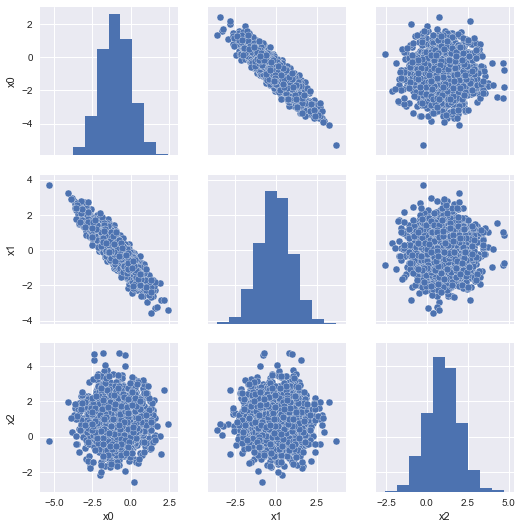

In [27]:
visualize_3d()

Read about [correlation and covariance](https://en.wikipedia.org/wiki/Covariance_and_correlation), then implement the function below to create a 2x2 covariance matrix given values of $\sigma_x$, $\sigma_y$ and the correlation coefficient $\rho$:

In [1]:
def create_2d_covariance(sigma_x, sigma_y, rho):
    """Create and return the 2x2 covariance matrix specified by the input args.
    """
    assert (sigma_x > 0) and (sigma_y > 0), 'sigmas must be > 0.'
    # YOUR CODE HERE
    return np.array([[sigma_x**2,rho*sigma_x*sigma_y],[rho*sigma_x*sigma_y,sigma_y**2]])
    #raise NotImplementedError()

In [5]:
create_2d_covariance(1., 1., 0.0)

array([[1., 0.],
       [0., 1.]])

In [6]:
# A correct solution should pass these tests.
assert np.array_equal(create_2d_covariance(1., 1., 0.0), [[1., 0.], [0., 1.]])
assert np.array_equal(create_2d_covariance(2., 1., 0.0), [[4., 0.], [0., 1.]])
assert np.array_equal(create_2d_covariance(2., 1., 0.5), [[4., 1.], [1., 1.]])
assert np.array_equal(create_2d_covariance(2., 1., -0.5), [[4., -1.], [-1., 1.]])

Run the following cell that uses your `create_2d_covariance` and `generate_normal` functions to compare the 2D normal distributions with $\rho = 0$ (blue), $\rho = +0.9$ (red) and $\rho = -0.9$ (green):

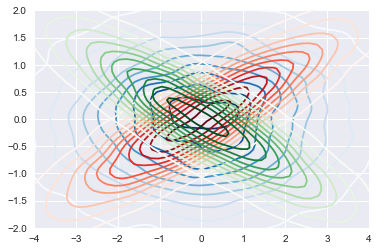

In [61]:
def compare_rhos():
    mu = np.zeros(2)
    sigma_x, sigma_y = 2., 1.
    for rho, cmap in zip((0., +0.9, -0.9), ('Blues', 'Reds', 'Greens')):
        C = create_2d_covariance(sigma_x, sigma_y, rho)
        X = generate_normal(mu, C, 10000)
        sns.kdeplot(X[:, 0], X[:, 1], cmap=cmap)
    plt.xlim(-4, +4)
    plt.ylim(-2, +2)
        
compare_rhos()